In [2]:
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

In [3]:
from scipy.stats import arcsine

Text(0.5, 0, '$x$')

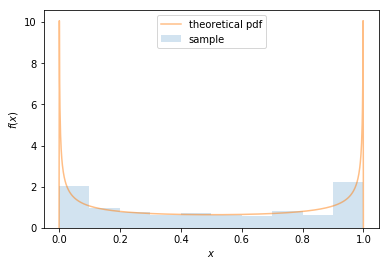

In [11]:
# Генерируем выборку размерности 1000 из арксинусного распределения и строим гисторамму выборки
arcsine_rvs = arcsine()
r = arcsine_rvs.rvs(size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label='sample')

# поверх гистограммы рисуем теоритическую плотность распредления случайной величины
x = np.linspace(0,1,1000)
pdf = arcsine_rvs.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [12]:
arcsine_rvs.mean()

0.5

In [14]:
arcsine_rvs.var()

0.125

In [19]:
def experiment(rv, n):
    # генерируем 1000 выборок объёма n 
    sample_means = [sample.mean() for sample in [rv.rvs(n) for i in range(1000)]]
    sample_means_actual_mean = np.array(sample_means).mean()
    sample_means_actual_std = np.array(sample_means).std()
    theoretical_mean = rv.mean()
    theoretical_var = rv.var()
    print('SAMPLE MEANS MEAN {0:.4f}'.format(sample_means_actual_mean))
    print('SAMPLE MEANS STD {0:.4f}'.format(sample_means_actual_std))
    print('CLT MEAN {0:.4f}'.format(theoretical_mean))
    print('CLT STD {0:.4f}'.format(math.sqrt(theoretical_var/n)))
    # строим гистограммы распределений выборочных средних
    plt.figure()
    plt.title('Distribution of sample means n={}'.format(n))
    plt.hist(sample_means, density=True, label='means histogram')
    #  Используя информацию о среднем и дисперсии исходного распределения, считаем значения параметров нормальных распределений,
#     которыми, согласно центральной предельной теореме, приближается распределение выборочных средних
    norm_rv = stats.norm(theoretical_mean, math.sqrt(theoretical_var/k))
    x = np.linspace(0, 1, 1000)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

 ## n = 5

SAMPLE MEANS MEAN 0.4984
SAMPLE MEANS STD 0.1560
CLT MEAN 0.5000
CLT STD 0.1581


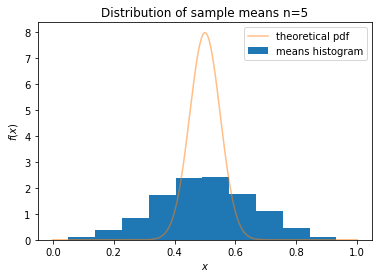

In [20]:
experiment(arcsine_rvs, 5)

## n=10

SAMPLE MEANS MEAN 0.4983
SAMPLE MEANS STD 0.1130
CLT MEAN 0.5000
CLT STD 0.1118


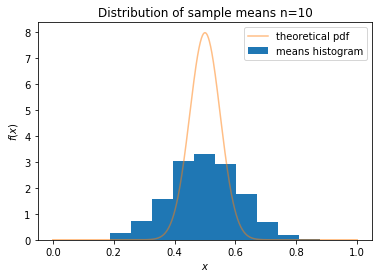

In [21]:
experiment(arcsine_rvs, 10)

## n=50

SAMPLE MEANS MEAN 0.5002
SAMPLE MEANS STD 0.0498
CLT MEAN 0.5000
CLT STD 0.0500


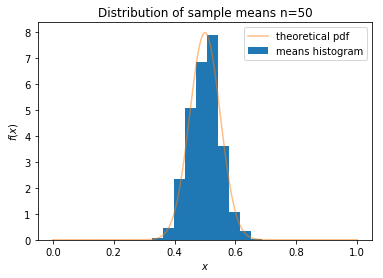

In [22]:
experiment(arcsine_rvs, 50)

## ВЫВОД

#### При достаточно большом заначении n среднее значение выборочных средних приблежается к среднему исходного распределения по центральной предельной теореме.